In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("spotify dataset.csv")

In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [5]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_features = df[features]

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [7]:
df.describe()

track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean           0.084760      0.190175      0.510556    120.883642   
std            0.224245      0.154313      0.233152     26.903632   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.961000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918250   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32828.000000  
mean   225796.829779  
std     59836.492346  
min      4000.000000  
25%    187804.500000  
50%    216000.000000  
75%    253581.250000  
max    517810.000000

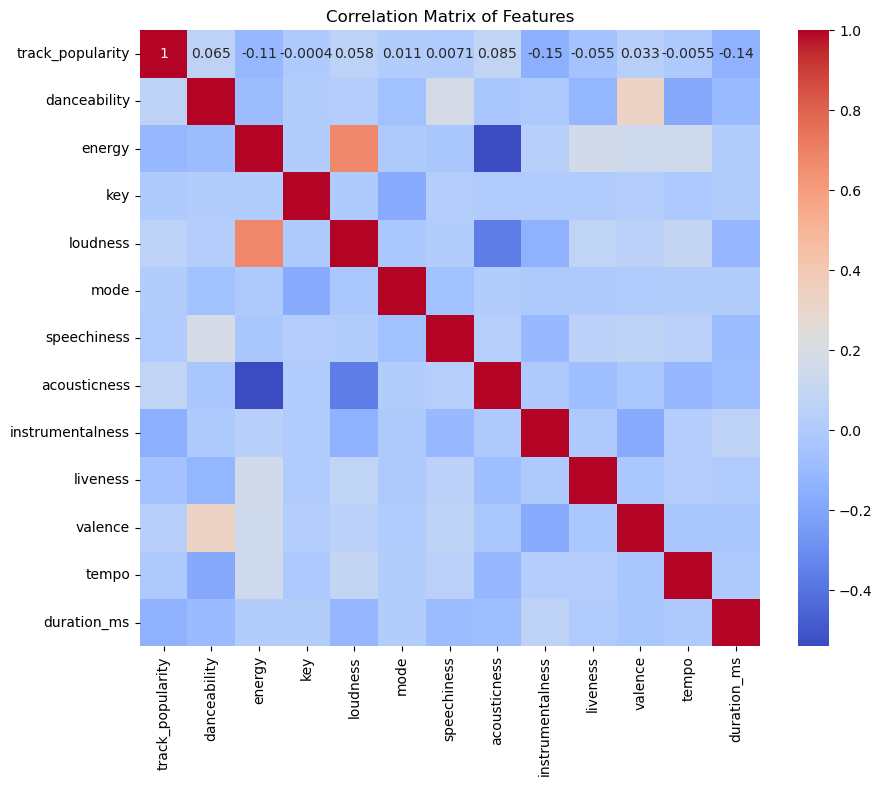

In [8]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

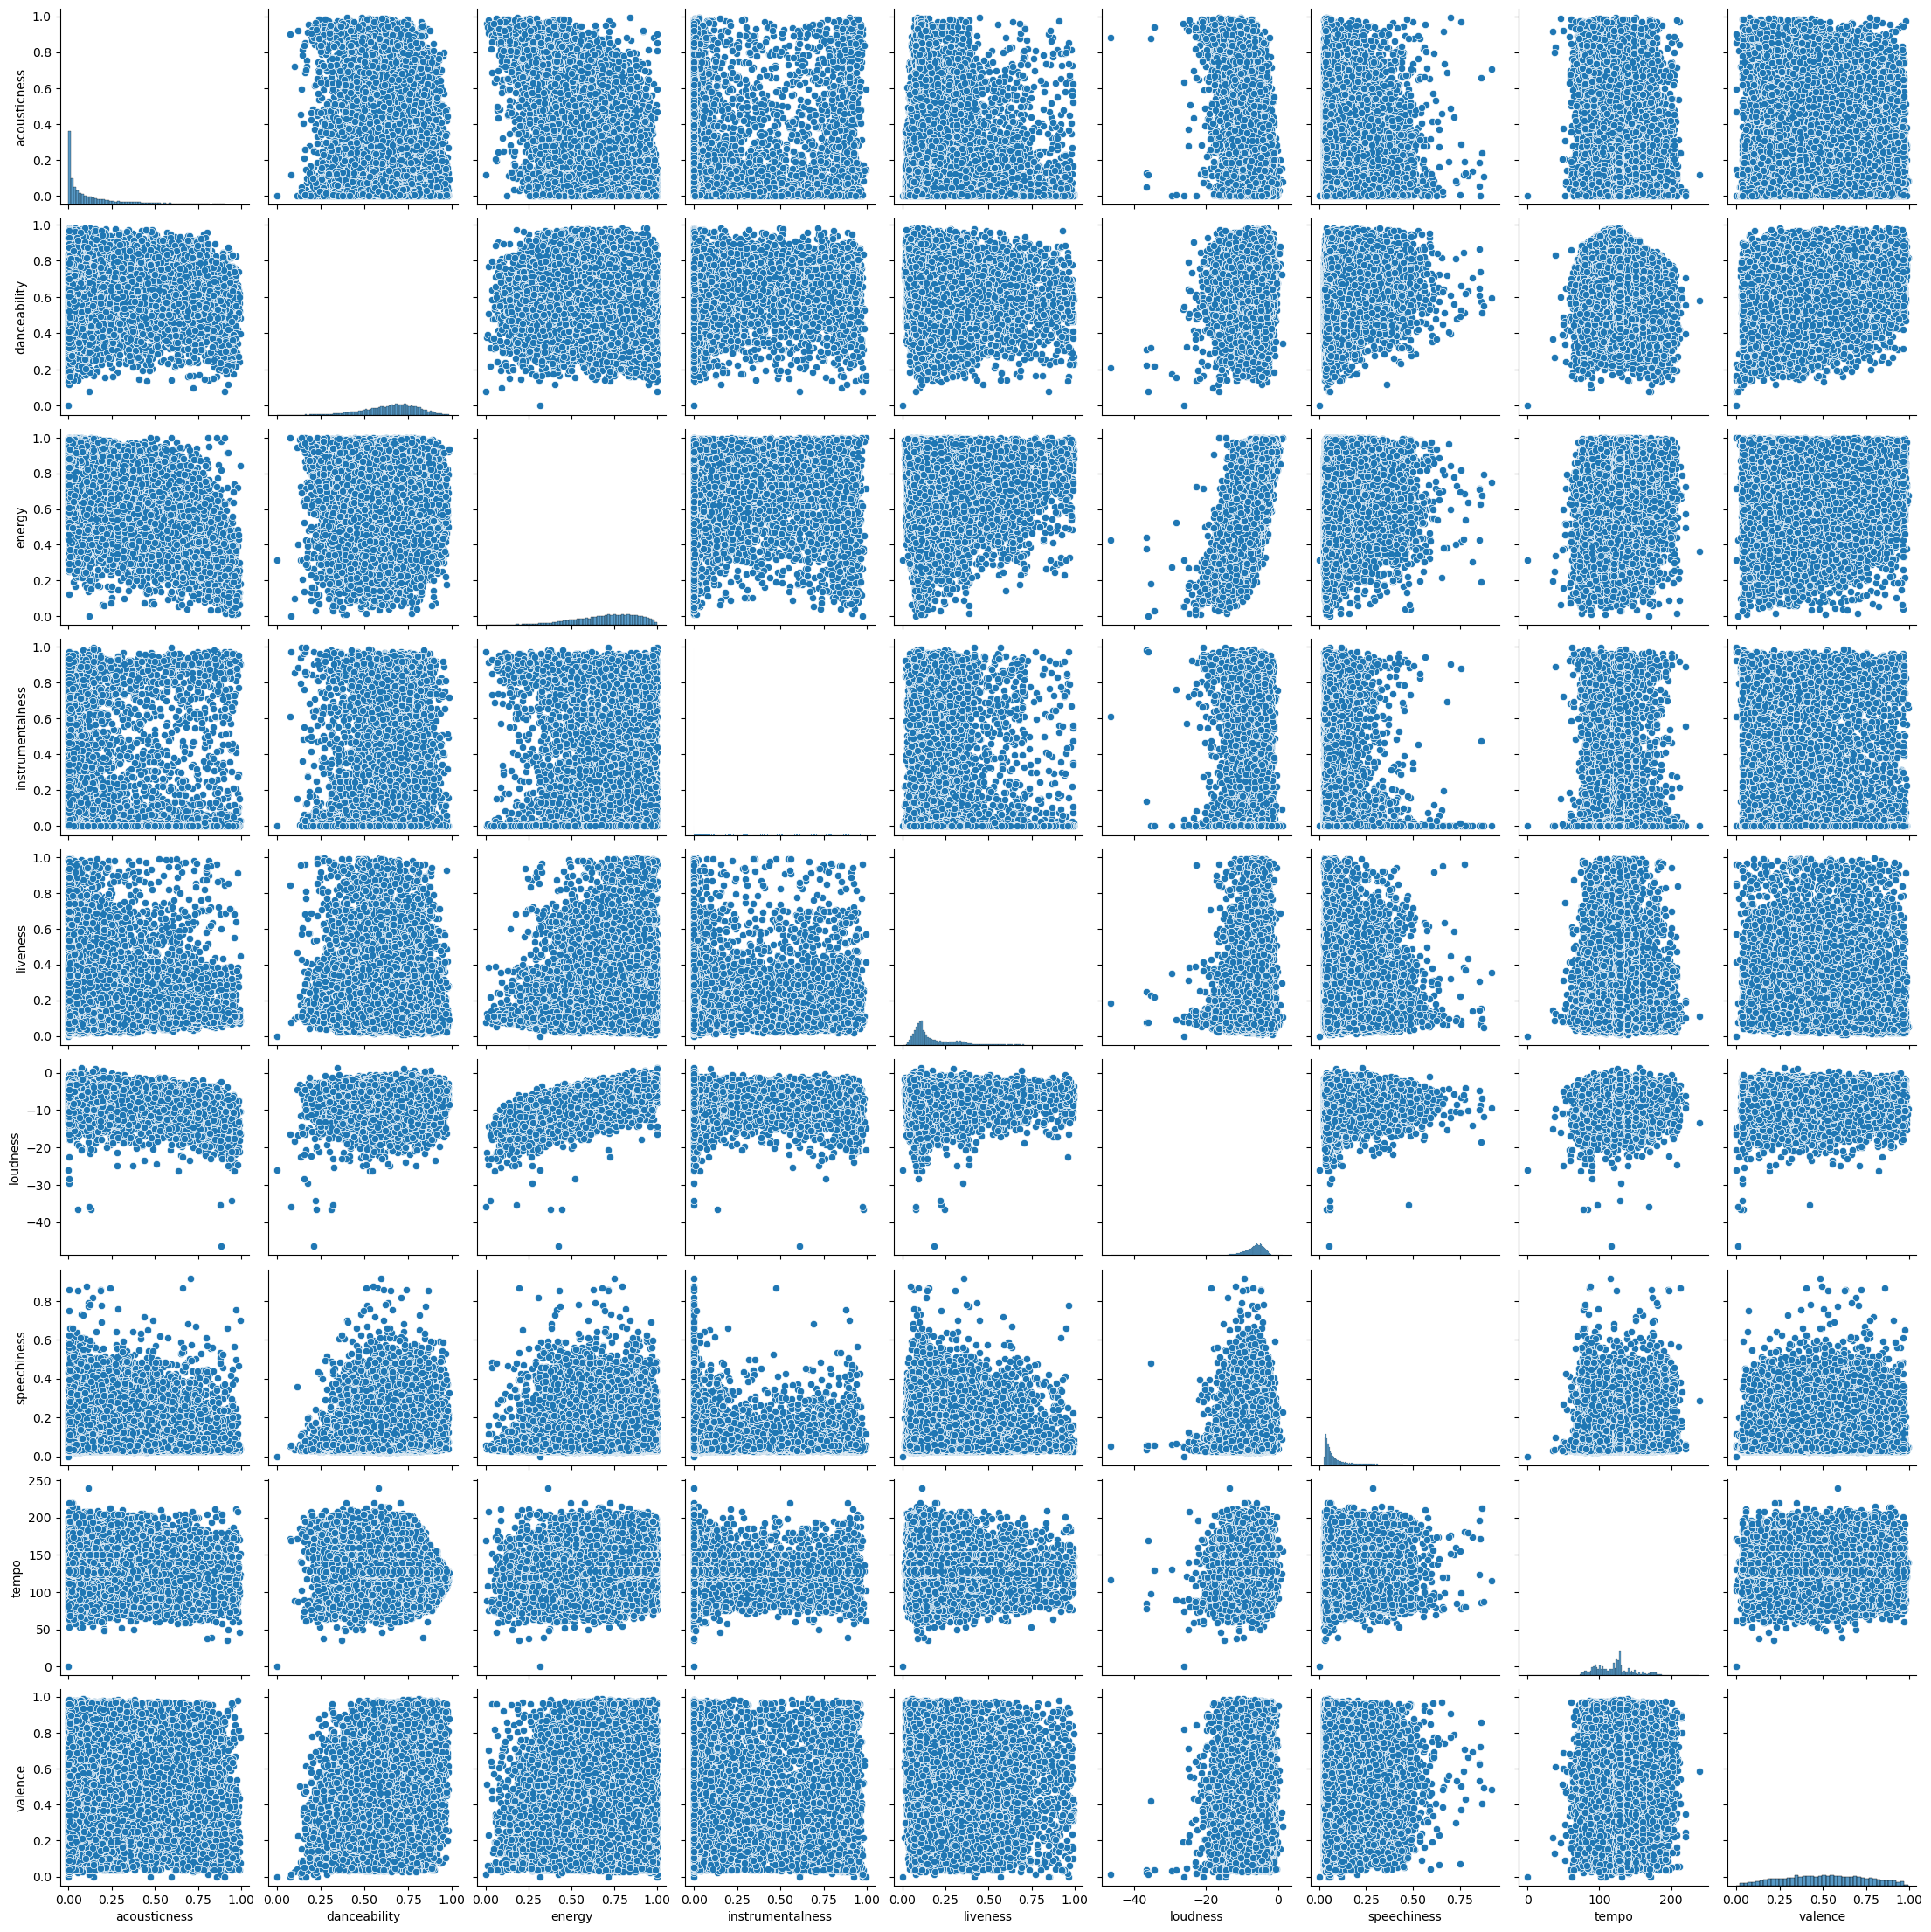

In [9]:
sns.pairplot(df[features])
plt.show()

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


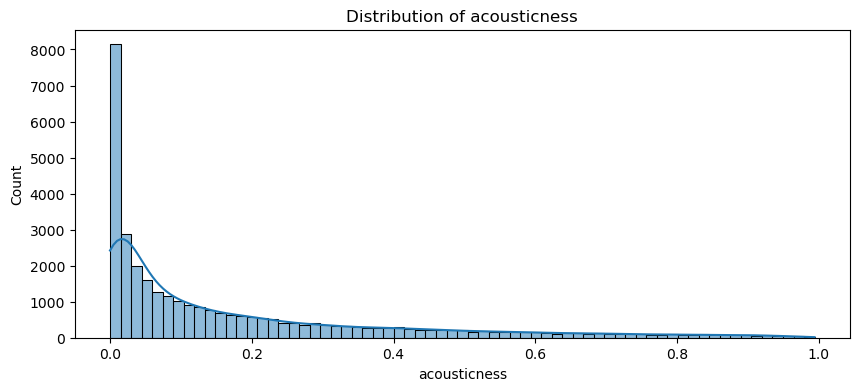

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


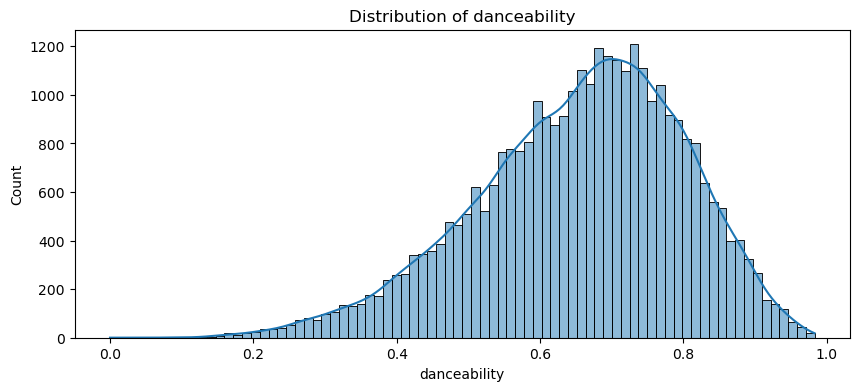

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


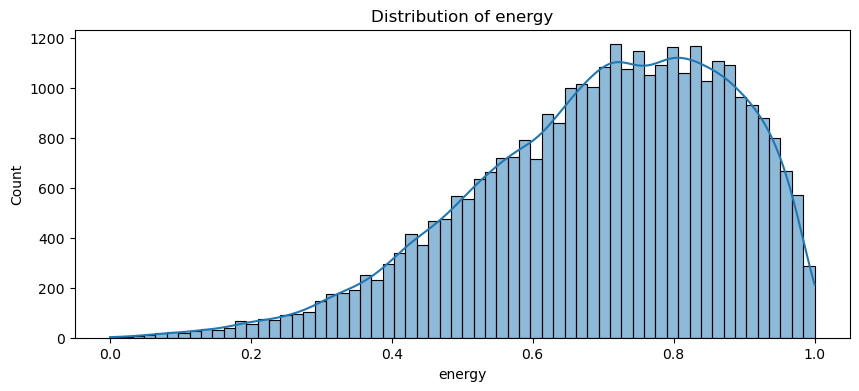

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


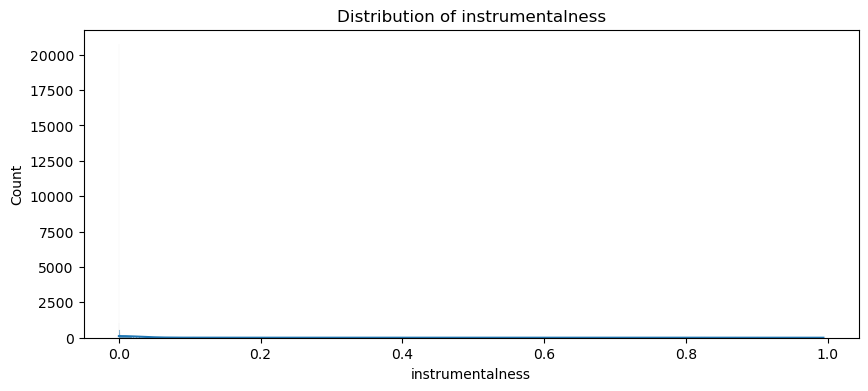

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


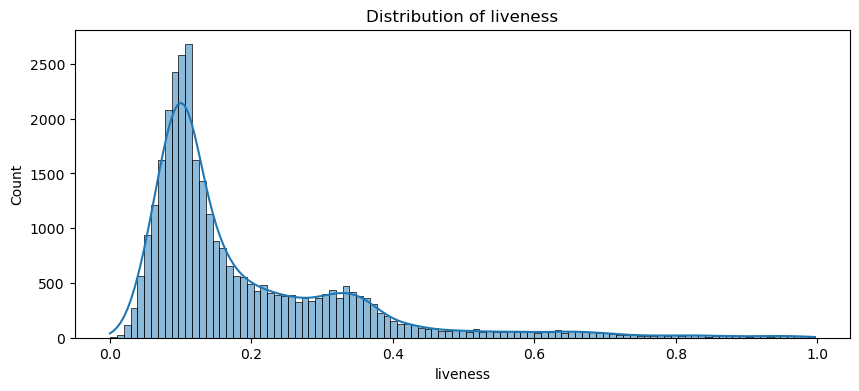

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


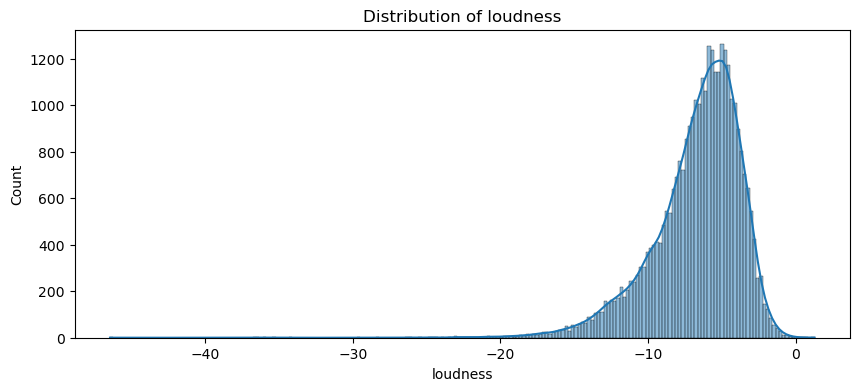

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


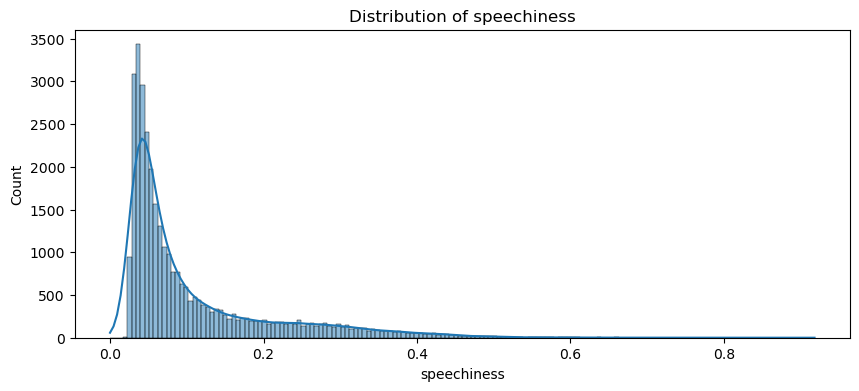

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


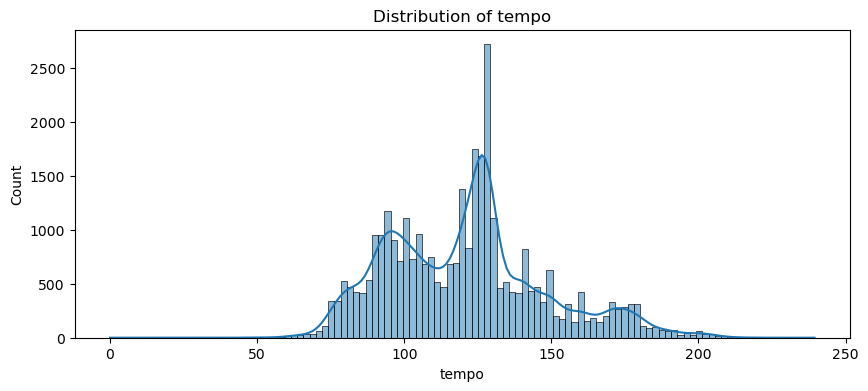

C:\Users\Bhava\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


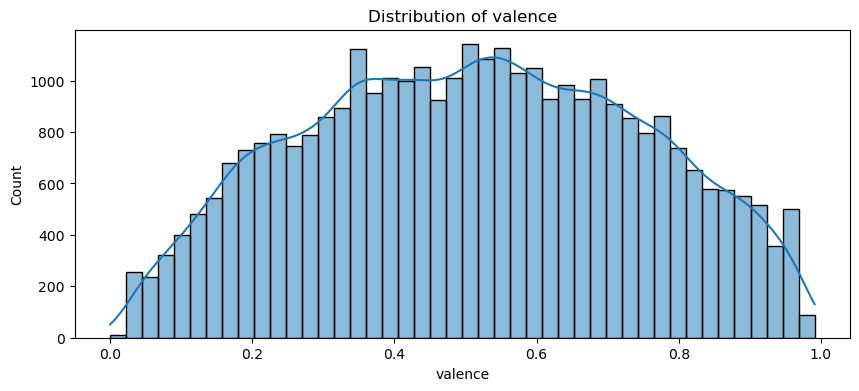

In [10]:
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [11]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['tempo', 'valence'])

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

C:\Users\Bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
 df_features = df_features.dropna()
df = df.loc[df_features.index]

In [14]:
df['cluster'] = clusters

In [15]:
print("Columns in df:", df.columns)
print("Cluster column dtype:", df['cluster'].dtype)

Columns in df: Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'cluster'],
      dtype='object')
Cluster column dtype: int32


In [16]:
df_pca['cluster'] = clusters
df['cluster'] = df['cluster'].astype(str)

In [ ]:
silhouette_avg = silhouette_score(df_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

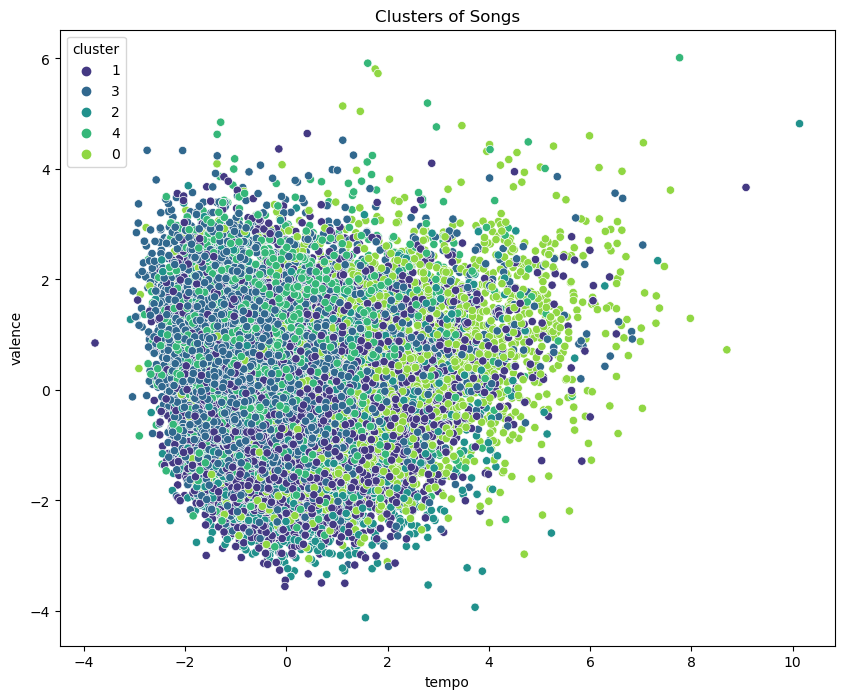

In [20]:
df_pca['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tempo', y='valence', hue='cluster', data=df_pca, palette='viridis')
plt.title('Clusters of Songs')
plt.show()

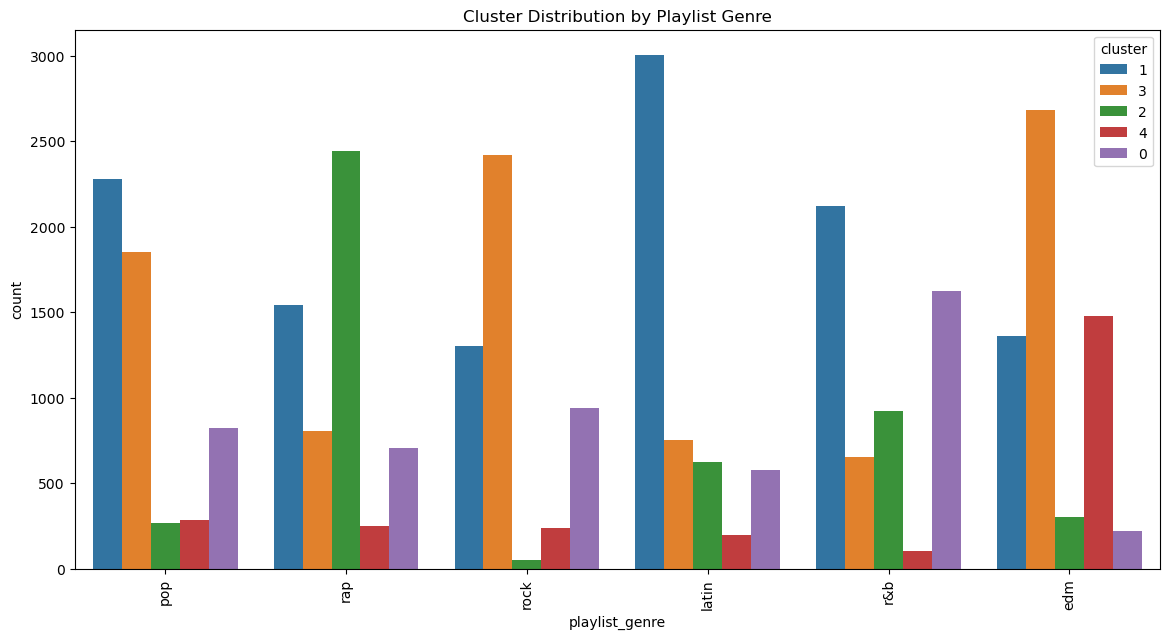

In [21]:
# Convert cluster labels to strings for plotting
df['cluster'] = df['cluster'].astype(str)

# Plot the cluster distribution by playlist genre
plt.figure(figsize=(14, 7))
sns.countplot(x='playlist_genre', hue='cluster', data=df)
plt.title('Cluster Distribution by Playlist Genre')
plt.xticks(rotation=90)
plt.show()

In [22]:
def recommend_songs(song_features, n_recommendations=10):
    song_scaled = scaler.transform([song_features])
    cluster_label = kmeans.predict(song_scaled)[0]
    print("Predicted cluster label:", cluster_label)
    print("Unique clusters in df:", df['cluster'].unique())
    recommendations = df[df['cluster'] == str(cluster_label)].sample(n_recommendations)
    return recommendations

In [23]:
sample_song = df_features.iloc[0].values
recommended_songs = recommend_songs(sample_song)
print(recommended_songs)

Predicted cluster label: 1
Unique clusters in df: ['1' '3' '2' '4' '0']
                     track_id  \
16416  2ULleM0ihp3dVsEAzOr7vH   
27223  24Yi9hE78yPEbZ4kxyoXAI   
19091  2Mb4KHDRhUJ3BoOZ7lGSy4   
32510  5lNRxj20YUieZmOz0JuK0m   
754    0wP3e5PzSxafy2TRtlayq9   
6160   0NBiC3zLXoBQXBjsbnbwJq   
26908  3DYLacJ3pnQXzogxRbIE0K   
10035  7mtGQwe1XBh3A9BgVainvb   
20588  7AYEj2PVoWljyLUEmNUvGt   
7254   60jhH0IOUgycrEJbK7zP1s   

                                             track_name  track_artist  \
16416                             Viaje Tropical - Live   Marissa Mur   
27223                             Roses - Imanbek Remix     SAINt JHN   
19091                               Hoy Se Bebe - Remix    Nio Garcia   
32510                                             Lambo     DubVision   
754                     Scatman (ski-ba-bop-ba-dop-bop)  Scatman John   
6160   Molly (feat. Brendon Urie of Panic at the Disco)     Lil Dicky   
26908                                Beat Of Your Hea

C:\Users\Bhava\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
